# ISYE6501x Homework 8
Done By: Joel Quek

## Question 11.1

Using the crime data set uscrime.txt from Questions 8.2, 9.1, and 10.1, build a regression model using:
1.	Stepwise regression
2.	Lasso
3.	Elastic net
For Parts 2 and 3, remember to scale the data first – otherwise, the regression coefficients will be on different scales and the constraint won’t have the desired effect.

For Parts 2 and 3, use the glmnet function in R.  

Notes on R:
•	For the elastic net model, what we called λ in the videos, glmnet calls “alpha”; you can get a range of results by varying alpha from 1 (lasso) to 0 (ridge regression) [and, of course, other values of alpha in between].
•	In a function call like glmnet(x,y,family=”mgaussian”,alpha=1) the predictors x need to be in R’s matrix format, rather than data frame format.  You can convert a data frame to a matrix using as.matrix – for example, x <- as.matrix(data[,1:n-1])
•	Rather than specifying a value of T, glmnet returns models for a variety of values of T. 


Source (StatQuest): https://www.youtube.com/watch?v=ctmNq7FgbvI

In [1]:
library(caret)
library(glmnet)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-6



In [2]:
crime <- read.table("uscrime.txt", header=TRUE)

In [3]:
head(crime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


---

## Base Model and Step Variable Selection

Source: https://www.youtube.com/watch?v=bgJfXMBEfZc

In [33]:
linear_model = lm(Crime~., data=crime)
summary(linear_model)


Call:
lm(formula = Crime ~ ., data = crime)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855e+0

Observation
- $R^2$ is 0.8031 which is very good
- F-statistic has p-value which is very small
- This model is a significant model

Now we want to build a smaller model using Step function.

In [34]:
model.final=step(linear_model)

Start:  AIC=514.65
Crime ~ M + So + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + 
    U2 + Wealth + Ineq + Prob + Time

         Df Sum of Sq     RSS    AIC
- So      1        29 1354974 512.65
- LF      1      8917 1363862 512.96
- Time    1     10304 1365250 513.00
- Pop     1     14122 1369068 513.14
- NW      1     18395 1373341 513.28
- M.F     1     31967 1386913 513.74
- Wealth  1     37613 1392558 513.94
- Po2     1     37919 1392865 513.95
<none>                1354946 514.65
- U1      1     83722 1438668 515.47
- Po1     1    144306 1499252 517.41
- U2      1    181536 1536482 518.56
- M       1    193770 1548716 518.93
- Prob    1    199538 1554484 519.11
- Ed      1    402117 1757063 524.86
- Ineq    1    423031 1777977 525.42

Step:  AIC=512.65
Crime ~ M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + U2 + 
    Wealth + Ineq + Prob + Time

         Df Sum of Sq     RSS    AIC
- Time    1     10341 1365315 511.01
- LF      1     10878 1365852 511.03
- Pop     1     14127 13691

We wish to select, from among the candidate models, the model that minimizes the information loss. We look for the model with lower AIC scores to minimize information loss.

In [37]:
summary(model.final)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = crime)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


Observation
- The final model only has 8 predictors as opposed to the original 15
- The final model with the lowest AIC score actually ended up having a reduced $R^2$ score
- But we observe that all predictors are significant due to the p-values (t test)
- The F-statistic is also significant

---

## Stepwise Regression

Source: https://www.youtube.com/watch?v=vFH--Xdt3Pk
trControl Source: https://www.rdocumentation.org/packages/caret/versions/2.27/topics/train

In [5]:
set.seed(1)

train_rows <- sample(1:nrow(crime),as.integer(0.7*nrow(crime),replace=F))

train = crime[train_rows,]

test = crime[-train_rows,]

train_control <- trainControl(method ="cv", number =10)

stepwise <- train(Crime ~., data = crime , method ="lmStepAIC", trControl = train_control,trace=F)

stepwise$results

,parameter,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,253.266,0.5832771,216.4972,90.06367,0.3322636,84.15968


In [6]:
stepwise$finalModel


Call:
lm(formula = .outcome ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
    Prob, data = dat)

Coefficients:
(Intercept)            M           Ed          Po1          M.F           U1  
   -6426.10        93.32       180.12       102.65        22.34     -6086.63  
         U2         Ineq         Prob  
     187.35        61.33     -3796.03  


In [7]:
summary(stepwise)


Call:
lm(formula = .outcome ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
    Prob, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


The following line is from StatQuest (https://www.youtube.com/watch?v=ctmNq7FgbvI) 8:56

alpha0 represents RIDGE Regression

In [43]:
alpha0.fit<-cv.glmnet(x_train,y_train, type.measure="mse", alpha=0, family="gaussian")
alpha0.fit


Call:  cv.glmnet(x = x_train, y = y_train, type.measure = "mse", alpha = 0,      family = "gaussian") 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min 0.1444    90  0.5436 0.1477      15
1se 1.2274    67  0.6812 0.2150      15

In [44]:
alpha0.predicted<-predict(alpha0.fit, s=alpha0.fit$lambda.1se, newx=x_test)

In [45]:
mean((y_test-alpha0.predicted)^2)

[1] 0.4207487

---

Observation:
- this method is the same as what I did in the previous section.
- $R^2$ is 0.7888 which is good
- 8 significant predictors are selected out of 15
- F- statistic is also significant
- MSE is 0.420748688472113

---

## LASSO

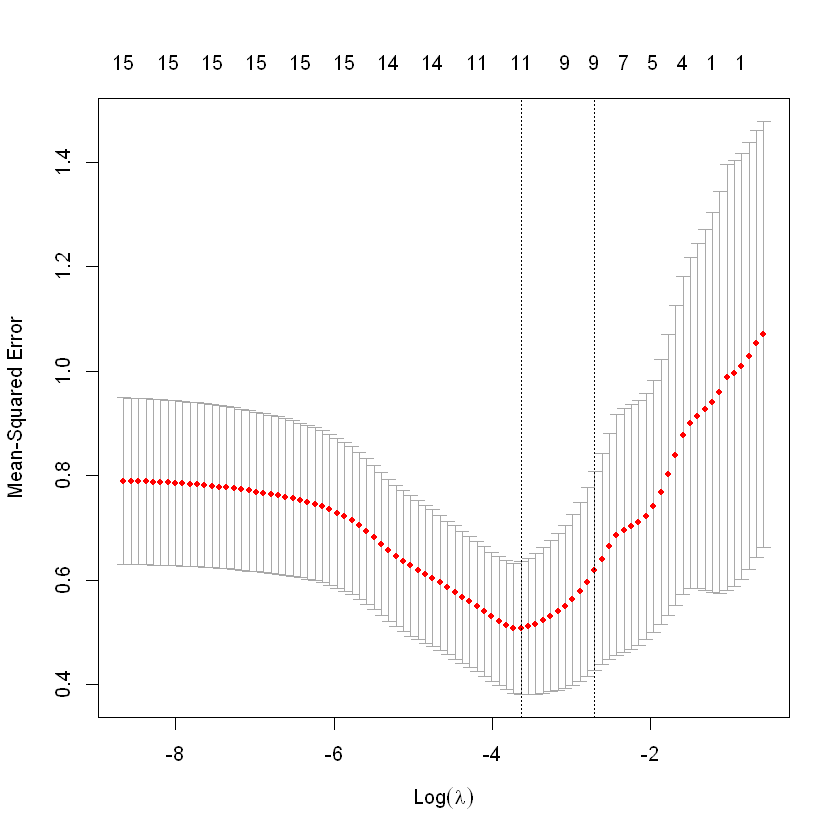

In [18]:
x_train<-scale(as.matrix(train)[,-16], center =TRUE, scale =TRUE)

y_train<-scale(as.matrix(train)[,16], center =TRUE, scale =TRUE)

lasso_model <- cv.glmnet(x_train, y_train, family="gaussian", alpha=1)
plot(lasso_model)

In [20]:
coef(lasso_model)

16 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  3.403255e-16
M            2.245276e-01
So           .           
Ed           2.054619e-01
Po1          6.927334e-01
Po2          .           
LF           .           
M.F          1.415977e-01
Pop          5.495775e-02
NW           3.017289e-02
U1           .           
U2           2.965666e-02
Wealth       .           
Ineq         3.855585e-01
Prob        -1.521280e-01
Time         .           

In [21]:
lambda <- lasso_cv$lambda.min
cat(lambda)

0.02195409

In [22]:
best_lasso = glmnet(xtrain, ytrain, family ="gaussian", alpha =1, lambda = lambda)
coef(best_lasso)

16 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  6.048164e-16
M            2.305511e-01
So           .           
Ed           6.425983e-01
Po1          7.498446e-01
Po2          .           
LF          -7.255044e-02
M.F          1.227830e-01
Pop          5.737205e-02
NW           1.713323e-01
U1           .           
U2           1.077069e-01
Wealth       7.695443e-02
Ineq         8.017996e-01
Prob        -1.899131e-01
Time         .           

In [23]:
# I need R Square
x_test<-scale(as.matrix(test)[,-16], center =TRUE, scale =TRUE)

y_test<-scale(as.matrix(test)[,16], center =TRUE, scale =TRUE)

The following line is from StatQuest (https://www.youtube.com/watch?v=ctmNq7FgbvI) 11:59

alpha1 represents LASSO Regression

In [39]:
alpha1.fit <- cv.glmnet(x_train,y_train, type.measure="mse", alpha=1, family="gaussian")
alpha1.fit


Call:  cv.glmnet(x = x_train, y = y_train, type.measure = "mse", alpha = 1,      family = "gaussian") 

Measure: Mean-Squared Error 

     Lambda Index Measure     SE Nonzero
min 0.03837    30  0.6380 0.1294      10
1se 0.07358    23  0.7535 0.1800       9

In [40]:
alpha1.predicted<-predict(alpha1.fit, s=alpha1.fit$lambda.1se, newx=x_test)

In [41]:
mean((y_test-alpha1.predicted)^2)

[1] 0.282617

Observation:
- The best Lambda Value is 0.02195
- The MSE for LASSO is 0.282616991992711 (an improvement)

---

## Elastic Net

In [24]:
train_control <- trainControl(method ="repeatedcv", number =10, repeats =5, search ="random", verboseIter =F)

elastic_model <- train(Crime ~ .,data = as.matrix(scale(train)),method ="glmnet",preProcess = c("center","scale"), tuneLength =10,trControl = train_cont)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


In [25]:
elastic_model$bestTune

,alpha,lambda
,<dbl>,<dbl>
5,0.4507055,0.04054113


The following line is from StatQuest (https://www.youtube.com/watch?v=ctmNq7FgbvI) 12:59

alpha0.5 represents Elastic Net Regression

In [46]:
alpha0.5.fit<-cv.glmnet(x_train,y_train,type.measure="mse", alpha=0.5, family="gaussian")

In [47]:
alpha0.5.predicted<-predict(alpha0.5.fit, s=alpha0.5.fit$lambda.1se, newx=x_test)

In [48]:
mean((y_test-alpha0.5.predicted)^2)

[1] 0.2924586

Observation:
- The best alpha value is 0.4507055
- The best Lambda Value is 0.04054
- MSE for Elastic Net is 0.292458616503691 (slightly higher than LASSO)


---

## Preliminary Conclusion and Hyperparameter Tuning

At this point, LASSO is the best model

We still need to try different values of Alpha for Elastic Net

Source (StatQuest): https://www.youtube.com/watch?v=ctmNq7FgbvI

In [50]:
list.of.fits<-list()
for (i in 0:10){
    fit.name<-paste0("alpha",i/10)
    list.of.fits[[fit.name]]<-
    cv.glmnet(x_train,y_train,type.measure="mse", alpha=i/10,
             family="gaussian")
}


- When i=0, then alpha will be 0 and result in Ridge Regression
- When i=1, then alpha will be 0.1
- etc
- When i=10, then alpha=1, which results in Lasso Regression

In [53]:
results<-data.frame()
for (i in 0:10){
    fit.name<-paste0("alpha", i/10)
    predicted<-
    predict(list.of.fits[[fit.name]],
           s=list.of.fits[[fit.name]]$lambda.1se,newx=x_test)
    mse<-mean((y_test-predicted)^2)
    temp<-data.frame(alpha=i/10,mse=mse,fit.name=fit.name)
    results<-rbind(results,temp)
}

In [54]:
results

alpha,mse,fit.name
<dbl>,<dbl>,<chr>
0.0,0.5048315,alpha0
0.1,0.5991401,alpha0.1
0.2,0.4128985,alpha0.2
0.3,0.2759187,alpha0.3
0.4,0.3342465,alpha0.4
0.5,0.3073987,alpha0.5
0.6,0.4251754,alpha0.6
0.7,0.3090506,alpha0.7
0.8,0.3025588,alpha0.8


The best fit is when $\alpha = 0.9$ where the MSE is 0.2676959

---